/root/code/data/相关性检测/LMC.csv
/root/code/data/相关性检测/LOL.csv
/root/code/data/相关性检测/LPFC.csv
/root/code/data/相关性检测/RMC.csv
/root/code/data/相关性检测/ROL.csv
/root/code/data/相关性检测/RPFC.csv


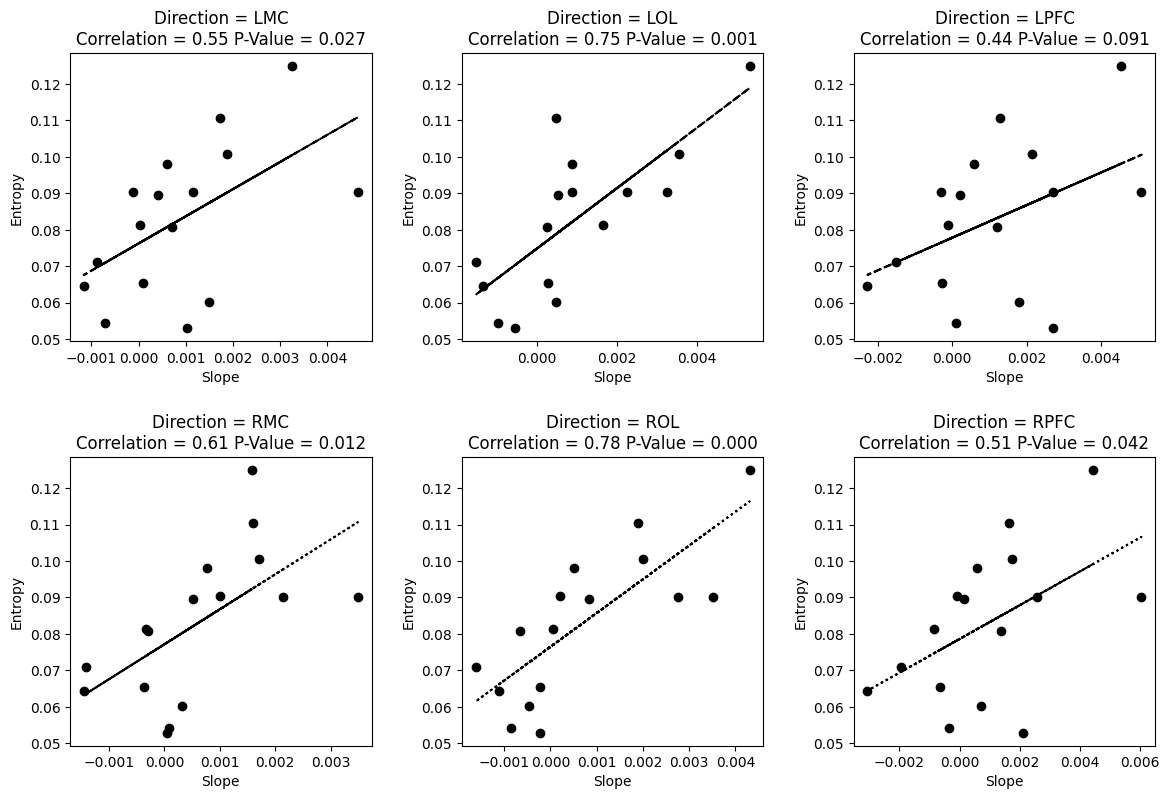

In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 指定包含CSV文件的文件夹路径
folder_path = "/root/code/data/相关性检测"

# 创建空的列表来存储数据
x = []
y = []

# 遍历文件夹中的每个文件
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # 构建完整的文件路径
        file_path = os.path.join(folder_path, filename)
        print(file_path)

        # 读取CSV文件并将其附加到x和y列表中
        data = pd.read_csv(file_path)
        x.append(data["slope"].to_numpy())
        y.append(data["RTB.entropy"].to_numpy())

# 创建子图
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(14, 9))

# 方向信息
direction = [['LMC', 'LOL', 'LPFC'], ['RMC', 'ROL', 'RPFC']]

for i in range(3):
    # 计算Pearson相关系数和p-value
    corr_coef, p_value = pearsonr(x[i], y[i])

    # 绘制散点图
    ax[0, i].scatter(x[i], y[i], color='black')
    ax[0, i].set_xlabel('Slope')
    ax[0, i].set_ylabel('Entropy')
    ax[0, i].set_title(f'Direction = {direction[0][i]}\nCorrelation = {corr_coef:.2f} P-Value = {p_value:.3f}')

    # 绘制虚线
    ax[0, i].plot(x[i], np.poly1d(np.polyfit(x[i], y[i], 1))(x[i]), color='black', linestyle='--')

    corr_coef, p_value = pearsonr(x[i + 3], y[i + 3])

    ax[1, i].scatter(x[i + 3], y[i + 3], color='black')
    ax[1, i].set_xlabel(f'Slope')
    ax[1, i].set_ylabel(f'Entropy')
    ax[1, i].set_title(f'Direction = {direction[1][i]}\nCorrelation = {corr_coef:.2f} P-Value = {p_value:.3f}')

    # 绘制虚线
    ax[1, i].plot(x[i + 3], np.poly1d(np.polyfit(x[i + 3], y[i + 3], 1))(x[i + 3]), color='black', linestyle=':')

fig.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()
